# Questions to the data
1. Does the number of hauses in all houses groups remain stable or there were a construction side finished in the given time frame?
2. What was the weather in the region?
3. What was the price for gas/oil/elictricity?

In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
from typing import List, Tuple, Any

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
data = pd.read_csv('../data/public_data/train.csv')

In [11]:
data.head()

,pseudo_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,...,2019-08-28 19:00:00,2019-08-28 19:30:00,2019-08-28 20:00:00,2019-08-28 20:30:00,2019-08-28 21:00:00,2019-08-28 21:30:00,2019-08-28 22:00:00,2019-08-28 22:30:00,2019-08-28 23:00:00,2019-08-28 23:30:00
0,0x16cb02173ebf3059efdc97fd1819f14a2,45.023,39.9850,36.5695,34.7480,35.972,38.439,36.591,36.3155,32.6605,...,24.2880,23.994,26.1995,25.0270,23.0665,26.093,23.4295,25.4715,26.246,22.6020
1,0x1c9d08cd16fce04790ef900695861e786,2.931,1.6410,2.2600,2.2730,2.651,3.137,2.532,3.1420,2.5280,...,2.5700,1.446,1.5230,1.5630,2.5880,2.190,1.4860,2.5270,2.288,1.7940
2,0x1612e4cbe3b1b85c3dbcaeaa504ee8424,11.014,12.6525,10.8240,13.7485,12.383,12.342,13.413,11.4840,11.5105,...,6.3565,5.766,5.4955,5.0885,6.8140,7.492,5.7705,6.8240,6.072,6.7205
3,0x20158d36236a640cf0524dba149459169,55.813,49.0400,49.0950,41.1330,45.660,48.477,50.539,45.7370,42.6800,...,32.6460,30.439,30.2470,31.2660,34.3390,33.076,33.1080,33.7260,30.009,34.8400
4,0xc305005dcb1ed6128d816954c5ab9e7e,26.925,28.1180,25.6000,28.0910,26.530,23.858,26.556,27.7140,23.1740,...,13.3980,13.280,13.7340,13.6060,14.7000,16.290,15.1240,15.3650,14.360,13.9350


In [12]:
# drop index for feature preparation
data_ = data.drop(columns='pseudo_id')
# convert dates to pandas datetime
data_.columns = [datetime.strptime(c, "%Y-%m-%d %H:%M:%S") for c in data_.columns]
data_.head()

,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,2017-01-01 04:30:00,...,2019-08-28 19:00:00,2019-08-28 19:30:00,2019-08-28 20:00:00,2019-08-28 20:30:00,2019-08-28 21:00:00,2019-08-28 21:30:00,2019-08-28 22:00:00,2019-08-28 22:30:00,2019-08-28 23:00:00,2019-08-28 23:30:00
0,45.023,39.9850,36.5695,34.7480,35.972,38.439,36.591,36.3155,32.6605,0.1420,...,24.2880,23.994,26.1995,25.0270,23.0665,26.093,23.4295,25.4715,26.246,22.6020
1,2.931,1.6410,2.2600,2.2730,2.651,3.137,2.532,3.1420,2.5280,0.0000,...,2.5700,1.446,1.5230,1.5630,2.5880,2.190,1.4860,2.5270,2.288,1.7940
2,11.014,12.6525,10.8240,13.7485,12.383,12.342,13.413,11.4840,11.5105,0.0455,...,6.3565,5.766,5.4955,5.0885,6.8140,7.492,5.7705,6.8240,6.072,6.7205
3,55.813,49.0400,49.0950,41.1330,45.660,48.477,50.539,45.7370,42.6800,0.0000,...,32.6460,30.439,30.2470,31.2660,34.3390,33.076,33.1080,33.7260,30.009,34.8400
4,26.925,28.1180,25.6000,28.0910,26.530,23.858,26.556,27.7140,23.1740,0.0000,...,13.3980,13.280,13.7340,13.6060,14.7000,16.290,15.1240,15.3650,14.360,13.9350


# GROUP BY DAY

In [13]:
# Aggregate energy use values per day
data_ = data_.T.groupby(data_.T.index.date).sum()
data_.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
2017-01-01,1673.8655,143.162,586.9155,2094.588,1260.608,432.268,211.028,1191.6520,1456.7335,503.095,...,23.534,313.948,196.943,36.989,153.074,19.533,80.263,175.5120,40.8825,112.112
2017-01-02,1463.3230,130.557,532.9330,1845.933,1024.438,361.388,158.281,1022.2485,1319.9650,356.898,...,32.657,190.435,153.460,42.530,104.633,20.703,69.607,140.6670,31.2955,92.511
2017-01-03,1132.2910,99.234,407.0630,1475.750,725.995,279.199,125.445,765.0000,991.8735,257.116,...,15.138,110.994,88.819,33.476,79.647,14.527,38.887,108.7145,29.8745,64.486
2017-01-04,1183.8085,91.932,325.4720,1553.638,702.530,306.612,119.487,741.4780,1011.5705,278.864,...,19.211,55.876,78.585,30.363,75.137,16.648,53.533,117.0440,33.0020,54.094
2017-01-05,1125.2870,76.781,328.4645,1572.033,672.427,277.665,116.686,677.7000,1038.2905,284.385,...,10.200,57.125,79.498,30.640,76.458,17.598,48.185,119.8990,37.0340,48.022


In [14]:
# features["hour"] = data.index.hour
data_.columns = [c+1 for c in range(len(data_.columns))]
data_.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
2017-01-01,1673.8655,143.162,586.9155,2094.588,1260.608,432.268,211.028,1191.6520,1456.7335,503.095,...,23.534,313.948,196.943,36.989,153.074,19.533,80.263,175.5120,40.8825,112.112
2017-01-02,1463.3230,130.557,532.9330,1845.933,1024.438,361.388,158.281,1022.2485,1319.9650,356.898,...,32.657,190.435,153.460,42.530,104.633,20.703,69.607,140.6670,31.2955,92.511
2017-01-03,1132.2910,99.234,407.0630,1475.750,725.995,279.199,125.445,765.0000,991.8735,257.116,...,15.138,110.994,88.819,33.476,79.647,14.527,38.887,108.7145,29.8745,64.486
2017-01-04,1183.8085,91.932,325.4720,1553.638,702.530,306.612,119.487,741.4780,1011.5705,278.864,...,19.211,55.876,78.585,30.363,75.137,16.648,53.533,117.0440,33.0020,54.094
2017-01-05,1125.2870,76.781,328.4645,1572.033,672.427,277.665,116.686,677.7000,1038.2905,284.385,...,10.200,57.125,79.498,30.640,76.458,17.598,48.185,119.8990,37.0340,48.022


In [15]:
# check wether datetime in ascending order , it is important for time series
print(data_.index.is_monotonic)

True


In [16]:
# Set dates for development phase
new_date_range = pd.date_range(start="2017-01-01", end="2019-03-31", freq="D")
# Add test dates in the data frame
data_ = data_.reindex(new_date_range)
# using dummy values in test set , fill_value = 100
# df_ = df_.T

#data_.head()

In [17]:
# saving indexes for next steps
idx_test_date = data_.index[data_[1].isna()]
idx_test_date

DatetimeIndex(['2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11',
               '2017-02-12', '2017-02-13', '2017-02-14', '2017-03-25',
               '2017-03-26', '2017-03-27',
               ...
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-03-15',
               '2019-03-16', '2019-03-17', '2019-03-18', '2019-03-19',
               '2019-03-20', '2019-03-21'],
              dtype='datetime64[ns]', length=126, freq=None)

In [18]:
data_ = data_.fillna(method="backfill")

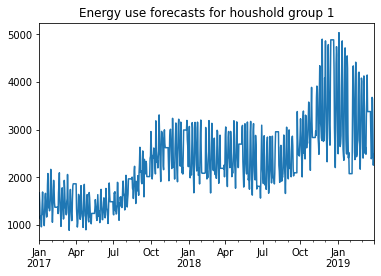

In [19]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':160})
data_[1].plot()
plt.title('Energy use forecasts for houshold group' + " 1")
plt.show()

In [20]:
data_\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / data_.shape[0])\
    .rename(columns={0: 'Number of missed data  points', 'perc': '% of missed data points'})

,Number of missed data points,% of missed data points
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
...,...,...
57,0,0.0
58,0,0.0
59,0,0.0
60,0,0.0


In [21]:
data_[37:45][1]

2017-02-07    1468.241
2017-02-08    1371.646
2017-02-09    1371.646
2017-02-10    1371.646
2017-02-11    1371.646
2017-02-12    1371.646
2017-02-13    1371.646
2017-02-14    1371.646
Freq: D, Name: 1, dtype: float64

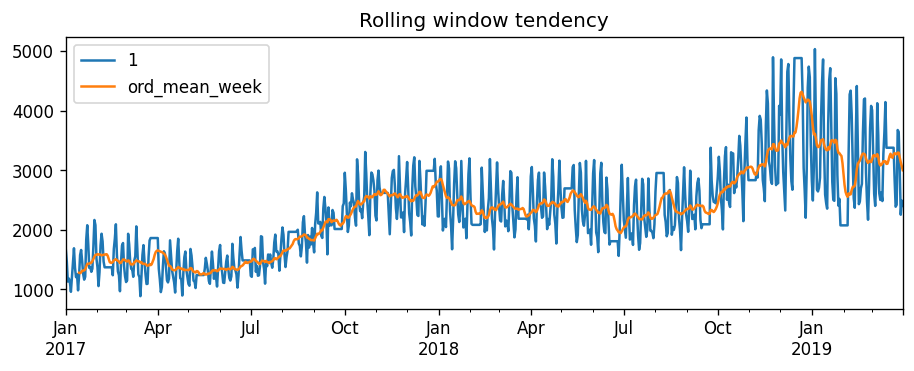

In [22]:
# plot data with rolling window to see tendency
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
data_['ord_mean_week'] = data_[1].rolling(14).mean()
data_[[1,'ord_mean_week']].plot()
plt.title('Rolling window tendency')
plt.show()

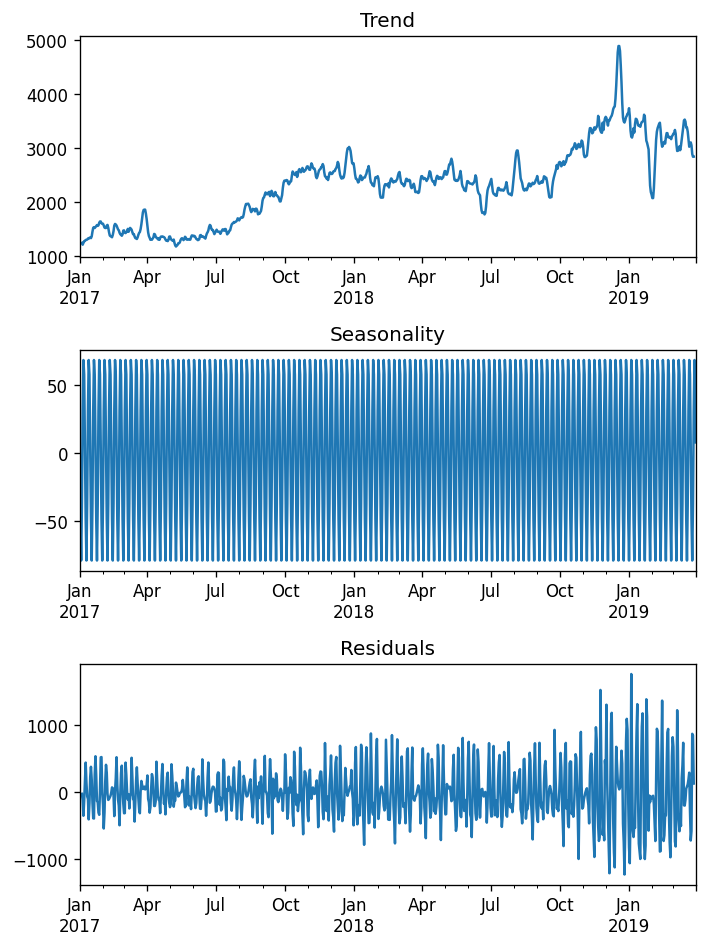

In [23]:
# plot trend, seasons and residuals
decomposed = seasonal_decompose(data_[1])

plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

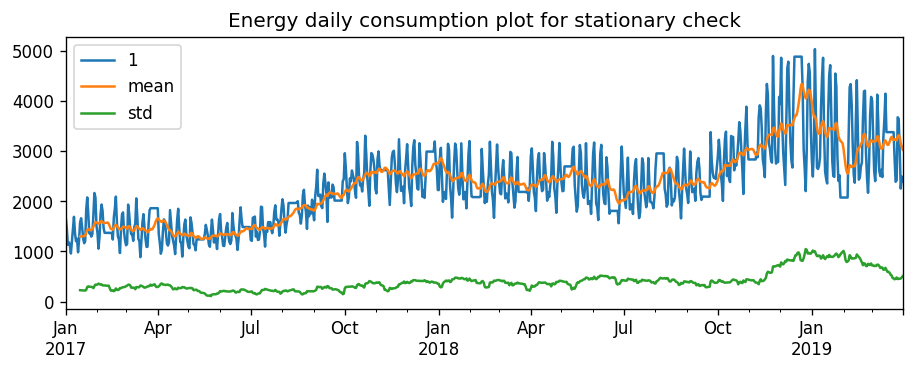

In [24]:
# plot mean and std of hourly orders to see whether data stationary or not

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
data_['mean'] = data_[1].rolling(15).mean()
data_['std'] = data_[1].rolling(15).std()
data_[[1,'mean','std']].plot()
plt.title('Energy daily consumption plot for stationary check')
plt.show()

In [25]:
#data_ = data_.drop(columns=62)
#data_.head()

# Adding features

In [64]:
df = data_.copy(deep=True)
df.drop(columns=['ord_mean_week','mean','std'],inplace=True)
df["weekday"] = data_.index.weekday
df["dayofyear"] = data_.index.dayofyear

In [65]:
df["is_weekend"] = data_.index.weekday.isin([5, 6]).astype(np.int32)
#df["weekofyear"] = data_.index.isocalendar
df["month"] = data_.index.month
df["season"] = (data_.index.month % 12 + 3) // 3

In [66]:
df

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,weekday,dayofyear,is_weekend,month,season
2017-01-01,1673.8655,143.162,586.9155,2094.588,1260.608,432.268,211.028,1191.6520,1456.7335,503.095,...,19.533,80.263,175.5120,40.8825,112.112,6,1,1,1,1
2017-01-02,1463.3230,130.557,532.9330,1845.933,1024.438,361.388,158.281,1022.2485,1319.9650,356.898,...,20.703,69.607,140.6670,31.2955,92.511,0,2,0,1,1
2017-01-03,1132.2910,99.234,407.0630,1475.750,725.995,279.199,125.445,765.0000,991.8735,257.116,...,14.527,38.887,108.7145,29.8745,64.486,1,3,0,1,1
2017-01-04,1183.8085,91.932,325.4720,1553.638,702.530,306.612,119.487,741.4780,1011.5705,278.864,...,16.648,53.533,117.0440,33.0020,54.094,2,4,0,1,1
2017-01-05,1125.2870,76.781,328.4645,1572.033,672.427,277.665,116.686,677.7000,1038.2905,284.385,...,17.598,48.185,119.8990,37.0340,48.022,3,5,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-27,3645.0890,261.033,888.2270,4306.199,2333.272,977.487,396.773,2270.9935,3310.6490,876.527,...,62.912,170.326,326.4415,104.3700,234.116,2,86,0,3,2
2019-03-28,2997.3715,218.526,547.1220,3472.952,1808.689,833.654,326.882,1794.9220,2686.1380,686.604,...,50.026,116.868,239.2755,82.4725,158.289,3,87,0,3,2
2019-03-29,2254.1045,170.737,353.0045,2631.766,1484.601,615.075,222.557,1345.3830,2010.5790,540.393,...,42.464,98.505,188.1385,57.4490,123.610,4,88,0,3,2
2019-03-30,2491.5945,147.279,328.3965,2924.391,1562.029,689.869,244.147,1405.5355,2269.1055,609.478,...,41.900,117.733,216.9915,61.2640,117.921,5,89,1,3,2


In [68]:
def create_features(houshold_id,df=df) -> pd.DataFrame:
    df_new = df[[houshold_id, "weekday", "dayofyear", "is_weekend", "season", "month"]]
    df_new['std'] = df_new[houshold_id].rolling(7).std().fillna(method="backfill")
    df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
    df_new['lag_1'] = df[houshold_id].shift(1).fillna(method="backfill")
    df_new['lag_2'] = df[houshold_id].shift(2).fillna(method="backfill")
    df_new['lag_3'] = df_new[houshold_id].shift(3).fillna(method="backfill")
    df_new['lag_4'] = df_new[houshold_id].shift(4).fillna(method="backfill")
    df_new['lag_5'] = df_new[houshold_id].shift(5).fillna(method="backfill")
    df_new['lag_6'] = df_new[houshold_id].shift(6).fillna(method="backfill")
    df_new['lag_7'] = df_new[houshold_id].shift(7).fillna(method="backfill")
    return df_new

In [69]:
result = create_features(1)

/tmp/ipykernel_32804/3561779689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['std'] = df_new[houshold_id].rolling(7).std().fillna(method="backfill")
/tmp/ipykernel_32804/3561779689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mean'] = df_new[houshold_id].rolling(7).mean().fillna(method="backfill")
/tmp/ipykernel_32804/3561779689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [70]:
result

,1,weekday,dayofyear,is_weekend,season,month,std,mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
2017-01-01,1673.8655,6,1,1,1,1,239.705460,1249.368643,1673.8655,1673.8655,1673.8655,1673.8655,1673.8655,1673.8655,1673.8655
2017-01-02,1463.3230,0,2,0,1,1,239.705460,1249.368643,1673.8655,1673.8655,1673.8655,1673.8655,1673.8655,1673.8655,1673.8655
2017-01-03,1132.2910,1,3,0,1,1,239.705460,1249.368643,1463.3230,1673.8655,1673.8655,1673.8655,1673.8655,1673.8655,1673.8655
2017-01-04,1183.8085,2,4,0,1,1,239.705460,1249.368643,1132.2910,1463.3230,1673.8655,1673.8655,1673.8655,1673.8655,1673.8655
2017-01-05,1125.2870,3,5,0,1,1,239.705460,1249.368643,1183.8085,1132.2910,1463.3230,1673.8655,1673.8655,1673.8655,1673.8655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-27,3645.0890,2,86,0,2,3,550.268519,3104.858643,3676.0080,2420.2560,2388.7150,2846.1065,3378.9180,3378.9180,3378.9180
2019-03-28,2997.3715,3,87,0,2,3,537.342348,3050.352000,3645.0890,3676.0080,2420.2560,2388.7150,2846.1065,3378.9180,3378.9180
2019-03-29,2254.1045,4,88,0,2,3,588.462917,2889.664357,2997.3715,3645.0890,3676.0080,2420.2560,2388.7150,2846.1065,3378.9180
2019-03-30,2491.5945,5,89,1,2,3,607.774608,2839.019786,2254.1045,2997.3715,3645.0890,3676.0080,2420.2560,2388.7150,2846.1065


In [31]:
def get_weeks(idx)-> List[List[pd._libs.tslibs.timestamps.Timestamp]]:
    idx = list(idx)
    count = 0
    weeks_to_predict = []
    week = []
    for i in range(len(idx)):
        if count > 6:
            weeks_to_predict.append(week)
            week = []
            count = 0
        week.append(idx[i])
        count += 1
    return weeks_to_predict

In [32]:
weeks_test_date = get_weeks(idx_test_date)

In [60]:
weeks_test_date

[[Timestamp('2017-02-08 00:00:00'),
  Timestamp('2017-02-09 00:00:00'),
  Timestamp('2017-02-10 00:00:00'),
  Timestamp('2017-02-11 00:00:00'),
  Timestamp('2017-02-12 00:00:00'),
  Timestamp('2017-02-13 00:00:00'),
  Timestamp('2017-02-14 00:00:00')],
 [Timestamp('2017-03-25 00:00:00'),
  Timestamp('2017-03-26 00:00:00'),
  Timestamp('2017-03-27 00:00:00'),
  Timestamp('2017-03-28 00:00:00'),
  Timestamp('2017-03-29 00:00:00'),
  Timestamp('2017-03-30 00:00:00'),
  Timestamp('2017-03-31 00:00:00')],
 [Timestamp('2017-05-09 00:00:00'),
  Timestamp('2017-05-10 00:00:00'),
  Timestamp('2017-05-11 00:00:00'),
  Timestamp('2017-05-12 00:00:00'),
  Timestamp('2017-05-13 00:00:00'),
  Timestamp('2017-05-14 00:00:00'),
  Timestamp('2017-05-15 00:00:00')],
 [Timestamp('2017-06-23 00:00:00'),
  Timestamp('2017-06-24 00:00:00'),
  Timestamp('2017-06-25 00:00:00'),
  Timestamp('2017-06-26 00:00:00'),
  Timestamp('2017-06-27 00:00:00'),
  Timestamp('2017-06-28 00:00:00'),
  Timestamp('2017-06-29 0

In [34]:
def data_split(result, weeks, n) -> Tuple[Any, Any]:
    # n test week number
    if n == 0:
        result = result[result.index < weeks[n][0]]
    elif n > 0:
        """
        TODO:
            - change split in a way that previous dates are accumulated with new predictions
        """
        result = result[(result.index > weeks[n-1][6]) & (result.index < weeks[n][0])]
    train_linear, test_linear = train_test_split(result, shuffle = False, test_size = 0.15)
    return train_linear, test_linear

In [35]:
result_splitted = []
for i in range(len(weeks_test_date)):
    train_linear, test_linear = data_split(result, weeks_test_date, i)
    result_splitted.append([train_linear, test_linear])

In [74]:
result_splitted[1][0]

,1,weekday,dayofyear,is_weekend,season,month,std,mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
2017-02-15,1371.6460,2,46,0,1,2,0.000019,1371.646000,1371.6460,1371.6460,1371.6460,1371.6460,1371.6460,1371.6460,1371.6460
2017-02-16,1238.3350,3,47,0,1,2,50.386822,1352.601571,1371.6460,1371.6460,1371.6460,1371.6460,1371.6460,1371.6460,1371.6460
2017-02-17,1677.4375,4,48,0,1,2,133.560431,1396.286071,1238.3350,1371.6460,1371.6460,1371.6460,1371.6460,1371.6460,1371.6460
2017-02-18,1851.9600,5,49,1,1,2,216.450366,1464.902357,1677.4375,1238.3350,1371.6460,1371.6460,1371.6460,1371.6460,1371.6460
2017-02-19,2093.7665,6,50,1,1,2,314.479444,1568.062429,1851.9600,1677.4375,1238.3350,1371.6460,1371.6460,1371.6460,1371.6460
2017-02-20,1584.5740,0,51,0,1,2,302.379519,1598.480714,2093.7665,1851.9600,1677.4375,1238.3350,1371.6460,1371.6460,1371.6460
2017-02-21,1302.0165,1,52,0,1,2,312.074957,1588.533643,1584.5740,2093.7665,1851.9600,1677.4375,1238.3350,1371.6460,1371.6460
2017-02-22,1238.0375,2,53,0,1,2,331.059358,1569.446714,1302.0165,1584.5740,2093.7665,1851.9600,1677.4375,1238.3350,1371.6460
2017-02-23,969.9415,3,54,0,1,2,386.670101,1531.104786,1238.0375,1302.0165,1584.5740,2093.7665,1851.9600,1677.4375,1238.3350
2017-02-24,1444.2405,4,55,0,1,2,381.978632,1497.790929,969.9415,1238.0375,1302.0165,1584.5740,2093.7665,1851.9600,1677.4375


In [37]:
result_splitted[0][1]

,1,weekday,dayofyear,is_weekend,season,month,std,mean,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
2017-02-02,1056.1095,3,33,0,1,2,404.785860,1609.481357,1372.3825,1519.7760,2080.0100,2166.1485,1723.7790,1348.1640,1296.3925
2017-02-03,1290.8265,4,34,0,1,2,411.479861,1601.290286,1056.1095,1372.3825,1519.7760,2080.0100,2166.1485,1723.7790,1348.1640
2017-02-04,1737.6175,5,35,1,1,2,412.199046,1603.267214,1290.8265,1056.1095,1372.3825,1519.7760,2080.0100,2166.1485,1723.7790
2017-02-05,1935.3125,6,36,1,1,2,366.345664,1570.290643,1737.6175,1290.8265,1056.1095,1372.3825,1519.7760,2080.0100,2166.1485
2017-02-06,1807.4465,0,37,0,1,2,313.865940,1531.353000,1935.3125,1737.6175,1290.8265,1056.1095,1372.3825,1519.7760,2080.0100
2017-02-07,1468.2410,1,38,0,1,2,314.785816,1523.990857,1807.4465,1935.3125,1737.6175,1290.8265,1056.1095,1372.3825,1519.7760


In [38]:
features_train_linear = result_splitted[0][0].drop([1], axis=1)
features_valid_linear = result_splitted[0][1].drop([1], axis=1)
target_train_linear = result_splitted[0][0][1]
target_valid_linear = result_splitted[0][1][1]

In [39]:
model_linear = LinearRegression()
model_linear.fit(features_train_linear,target_train_linear)

LinearRegression()

In [40]:
predict = model_linear.predict(features_valid_linear)

In [41]:
print("RMSE тестовой выборки: ", mean_squared_error(target_valid_linear,predict, squared=False))

RMSE тестовой выборки:  254.98388264043547


In [42]:
target_valid_linear= target_valid_linear.to_frame()

In [43]:
target_valid_linear['predict'] = predict

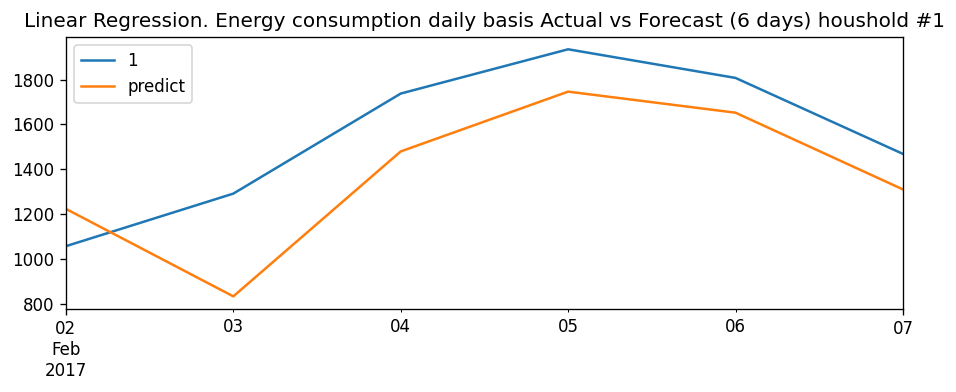

In [44]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
target_valid_linear.plot()
plt.title('Linear Regression. Energy consumption daily basis Actual vs Forecast (6 days) houshold #1')
plt.show()

In [45]:
target_valid_linear

,1,predict
2017-02-02,1056.1095,1222.626666
2017-02-03,1290.8265,831.952840
2017-02-04,1737.6175,1479.236409
2017-02-05,1935.3125,1746.210711
2017-02-06,1807.4465,1652.165591
2017-02-07,1468.2410,1309.573911


In [46]:
def get_test_predictions(result, week) -> pd.DataFrame:
    test_week = result[week[0]:week[6]]
    features_test_linear = test_week.drop([1], axis=1)
    target_test_linear = test_week[1]
    target_test_linear= target_test_linear.to_frame()
    predict_test = model_linear.predict(features_test_linear)
    target_test_linear['predict'] = predict_test

    return target_test_linear

In [47]:
week = weeks_test_date[0]
predict_test = get_test_predictions(result,week)
predict_test

,1,predict
2017-02-08,1371.646,1147.506122
2017-02-09,1371.646,1295.524195
2017-02-10,1371.646,1232.622930
2017-02-11,1371.646,1518.513109
2017-02-12,1371.646,1497.759138
2017-02-13,1371.646,1583.406886
2017-02-14,1371.646,1485.613948


In [48]:
week = weeks_test_date[0]
result_2 = result.copy(deep=True)

result_2.loc[week[0]:week[6],1] = predict_test['predict']


In [49]:
result_2.loc[week[0]:week[6],1]

2017-02-08    1147.506122
2017-02-09    1295.524195
2017-02-10    1232.622930
2017-02-11    1518.513109
2017-02-12    1497.759138
2017-02-13    1583.406886
2017-02-14    1485.613948
Freq: D, Name: 1, dtype: float64

In [ ]:
def predict_for_all() -> pd.DataFrame:
    # all weeks to be predicted
    weeks_test_date
    # funrtion def create_features(houshold_id) will give me result df for 1 houshold
    # def data_split(result, weeks, n) -> Tuple[Any, Any] returned result_splitted[0][0]
    # where first index is for traind and valid df and second is for test ds
    for i in range(len(weeks_test_date)):
        train_linear, test_linear = data_split(result, weeks_test_date, i)
        result_splitted.append([train_linear, test_linear])
       features_train_linear = result_splitted[0][0].drop([1], axis=1)
features_valid_linear = result_splitted[0][1].drop([1], axis=1)
target_train_linear = result_splitted[0][0][1]
target_valid_linear = result_splitted[0][1][1]
def get_test_predictions(result, week) -> pd.DataFrame:
   pass

In [ ]:
def data_split(result, weeks, n) -> Tuple[Any, Any]:
    if n == 0:
        result = result[result.index < weeks[n][0]]
    elif n > 0:
        result = result[(result.index > weeks[n-1][6]) & (result.index < weeks[n][0])]
    train_linear, test_linear = train_test_split(result, shuffle = False, test_size = 0.15)
    return train_linear, test_linear